In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import distance_matrix

In [48]:
n_point=25
np.random.seed(2002)

df=pd.DataFrame({
    'x': np.random.randint(0, 100, n_point),
    'y': np.random.randint(0, 100, n_point),
})

df.iloc[0]['x']=0
df.iloc[0]['y']=0

df

,x,y
0,0,0
1,18,1
2,8,46
3,73,72
4,44,41
5,56,26
6,13,66
7,87,39
8,4,63
9,25,32


In [49]:
d=distance_matrix(df[['x', 'y']].values, df[['x', 'y']].values)

In [50]:
d[0]

array([  0.        ,  18.02775638,  46.69047012, 102.53292154,
        60.14149982,  61.74139616,  67.26812024,  95.34149149,
        63.12685641,  40.60788101, 107.56393448,  57.03507693,
        85.47514259,  82.03657721,  38.01315562,  26.92582404,
       104.89041901,  86.97700846,  92.84934033,  94.5568612 ,
        80.50465825,  65.06919394,  80.0624756 , 100.        ,
       110.60289327])

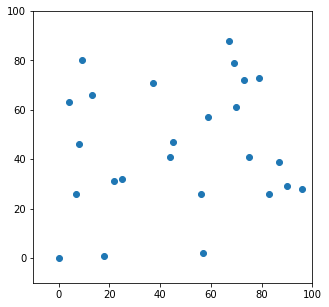

In [51]:
plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'])

plt.xlim([-10, 100])
plt.ylim([-10, 100])
plt.show()

In [52]:
location_list=np.arange(1, n_point)
path=[0]

In [57]:
while len(location_list) > 0:
    current_location=path[-1]

    # sort by value
    value, index=min((value, index) for (index, value) in enumerate(d[current_location][location_list]))
    next_location=location_list[index]
    #print(next_location)
    path.append(next_location)
    #print(path)
    location_list=list(location_list)
    location_list.remove(next_location)
    print(location_list)

[2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24]
[2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24]
[2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 18, 19, 20, 22, 23, 24]
[2, 3, 5, 6, 7, 8, 10, 11, 12, 16, 17, 18, 19, 20, 22, 23, 24]
[2, 3, 5, 6, 7, 8, 10, 11, 12, 16, 17, 19, 20, 22, 23, 24]
[2, 5, 6, 7, 8, 10, 11, 12, 16, 17, 19, 20, 22, 23, 24]
[2, 5, 6, 7, 8, 11, 12, 16, 17, 19, 20, 22, 23, 24]
[2, 5, 6, 7, 8, 11, 12, 17, 19, 20, 22, 23, 24]
[2, 5, 6, 7, 8, 11, 12, 17, 19, 20, 22, 23]
[2, 5, 6, 7, 8, 11, 12, 17, 19, 20, 23]
[2, 5, 7, 8, 11, 12, 17, 19, 20, 23]
[2, 5, 7, 11, 12, 17, 19, 20, 23]
[5, 7, 11, 12, 17, 19, 20, 23]
[5, 7, 11, 12, 17, 19, 23]
[7, 11, 12, 17, 19, 23]
[7, 12, 17, 19, 23]
[7, 12, 19, 23]
[7, 12, 23]
[7, 12]
[12]
[]


In [59]:
print(path)

[0, 1, 1, 15, 14, 9, 4, 21, 13, 18, 3, 10, 16, 24, 22, 6, 8, 2, 20, 5, 11, 17, 19, 23, 7, 12]


In [72]:
#routes=[(path[i], path[i+1]) for i in range(n_point)]
routes=[(path[i], path[i+1]) for i in range(len(path)-1)]+[(path[-1], 0)]
print(routes)

[(0, 1), (1, 1), (1, 15), (15, 14), (14, 9), (9, 4), (4, 21), (21, 13), (13, 18), (18, 3), (3, 10), (10, 16), (16, 24), (24, 22), (22, 6), (6, 8), (8, 2), (2, 20), (20, 5), (5, 11), (11, 17), (17, 19), (19, 23), (23, 7), (7, 12), (12, 0)]


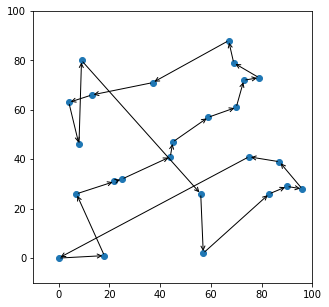

In [73]:
from matplotlib.patches import ArrowStyle
plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'])

arrowprops=dict(arrowstyle='->')
for i, j in routes:
    plt.annotate('', xy=[df.iloc[j]['x'], df.iloc[j]['y']], xytext=[df.iloc[i]['x'], df.iloc[i]['y']], arrowprops=arrowprops)
    

plt.xlim([-10, 100])
plt.ylim([-10, 100])
plt.show()